In [ ]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence

# init embedding
glove_embedding = WordEmbeddings('de-crawl')

In [ ]:
# english words embedding
en_embedding = WordEmbeddings('glove')

In [ ]:
def embed(word):
    # create sentence.
    sentence = Sentence(word)

    # embed a sentence using glove.
    glove_embedding.embed(sentence)

    # now check out the embedded tokens.
    for token in sentence:
        #print(token)
        #print(token.embedding)
        torch_tensor = token.embedding
        np_arr = torch_tensor.cpu().detach().numpy()
        return(np_arr)    

In [ ]:
def embed_en(word):
    # create sentence.
    sentence = Sentence(word)

    # embed a sentence using glove.
    en_embedding.embed(sentence)

    # now check out the embedded tokens.
    for token in sentence:
        #print(token)
        #print(token.embedding)
        torch_tensor = token.embedding
        np_arr = torch_tensor.cpu().detach().numpy()
        return(np_arr) 

In [5]:
embed('Alles')

array([-0.0312,  0.0246,  0.0563, -0.    ,  0.0175, -0.06  , -0.0356,
       -0.0589,  0.0037,  0.0257, -0.0082, -0.048 ,  0.0091, -0.0106,
       -0.0848, -0.1172,  0.0391, -0.0382, -0.0252, -0.0812,  0.0134,
        0.0119,  0.027 ,  0.015 ,  0.0026,  0.0277,  0.0092,  0.0222,
        0.0159,  0.002 ,  0.0974, -0.0257, -0.0019, -0.0929,  0.0111,
       -0.0111, -0.0229,  0.1161, -0.0345, -0.1042,  0.0099, -0.054 ,
        0.0373, -0.0115, -0.0523, -0.0097,  0.0188,  0.0204,  0.0048,
       -0.0762, -0.0294, -0.0072, -0.0143, -0.0305, -0.0112,  0.0083,
       -0.0064,  0.0513, -0.0103, -0.102 , -0.0358, -0.0458, -0.0349,
        0.0992,  0.0205, -0.0247,  0.0157, -0.0332,  0.009 , -0.1691,
       -0.0371, -0.0963, -0.0576,  0.0081, -0.0069,  0.0516,  0.041 ,
        0.0151,  0.0144, -0.0216,  0.0075,  0.0487, -0.0406, -0.0249,
       -0.05  ,  0.1426, -0.0039, -0.0336,  0.0233, -0.0105,  0.0521,
       -0.0111, -0.0382,  0.0133,  0.0094,  0.0949, -0.0411, -0.0459,
        0.0366, -0.0

In [6]:
embed_en('Everything')

array([ 0.013026 ,  0.33335  ,  0.62812  , -0.089324 , -0.13434  ,
        0.26948  , -0.17045  ,  0.039592 ,  0.19847  , -0.054669 ,
        0.59498  ,  0.31745  ,  0.28691  ,  0.42015  , -0.23682  ,
       -0.3583   , -0.45421  ,  0.87357  , -0.26887  ,  0.38228  ,
       -0.013516 ,  0.18781  ,  0.11409  , -0.91682  ,  0.17019  ,
        0.14309  , -0.52976  , -0.9702   , -0.21943  , -0.4512   ,
       -0.25972  ,  0.55875  , -0.07939  ,  0.098255 , -0.15482  ,
        0.11926  ,  0.034281 , -0.079117 , -0.18668  , -0.64334  ,
        0.026627 , -0.15963  ,  0.12529  , -0.44979  , -0.99793  ,
        0.13604  , -0.28778  , -0.059987 ,  0.019177 , -1.2517   ,
        0.5363   ,  0.37451  ,  0.12018  ,  0.93167  , -0.16836  ,
       -1.9662   ,  0.19831  ,  0.70928  ,  1.3088   ,  0.22569  ,
       -0.028412 ,  1.2327   , -0.44345  , -0.34264  ,  0.6256   ,
        0.43331  ,  0.95851  ,  0.030527 , -0.10855  , -0.17556  ,
        0.37907  , -0.12585  ,  0.32332  ,  0.10456  ,  0.8010

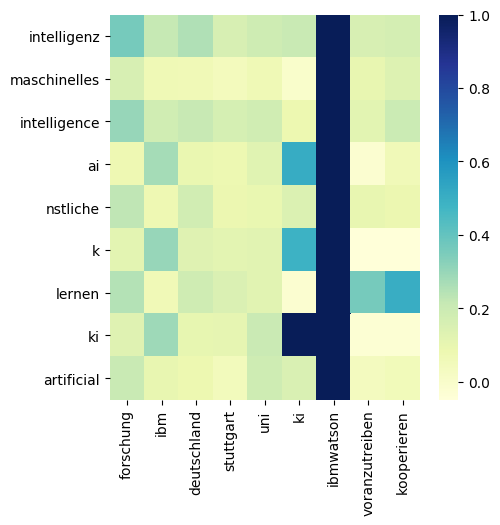

75.24

In [33]:
#gloveFile = "glove.6B.50d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

import re
from nltk.corpus import stopwords
import pandas as pd


def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("german"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(embed(word1), embed(word2)))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([embed(word) for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([embed(word) for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    return(round((1-cosine)*100,2))

import seaborn as sns
import matplotlib.pyplot as plt    

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    pyplot.show()
    # ax_red = sns.heatmap(df)
#    print()
    return cosine_distance_wordembedding_method(s1, s2)
#
ss1 = 'ai artificial Intelligence maschinelles Lernen künstliche Intelligenz ki'
ss2 = 'IBM und Uni Stuttgart kooperieren um die KI-Forschung in Deutschland voranzutreiben! #ibm4ins #KI #IBMWatson'
#model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)

In [55]:
#ss1 is all the themes 
ss1 = 'ai artificial Intelligence maschinelles Lernen künstliche Intelligenz ki digitalisierung unternehmen'
ss2 = 'Kundenservice per Chat über Handy oder Tablet? Bei vielen Direktbanken längst Realität. Welche Vorteile #Chatbots für Kunden und Finanzdienstleister mit sich bringen und wie die Filialbank der Zukunft aussehen könnte, lesen Sie hier. https://t.co/b8p9ccNeh8'

#model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)

73.42

In [6]:
#gloveFile = "glove.6B.50d.txt"
import numpy as np
import re
from nltk.corpus import stopwords
import pandas as pd


def preprocess_en(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words_en(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(embed_en(word1), embed_en(word2)))

def calculate_heat_matrix_for_two_sentences_en(s1,s2):
    s1 = preprocess_en(s1)
    s2 = preprocess_en(s2)
    result_list = [[cosine_distance_between_two_words_en(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method_en(s1, s2):
    import scipy
    vector_1 = np.mean([embed_en(word) for word in preprocess_en(s1)],axis=0)
    vector_2 = np.mean([embed_en(word) for word in preprocess_en(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    return(round((1-cosine)*100,2))

import seaborn as sns
import matplotlib.pyplot as plt

def heat_map_matrix_between_two_sentences_en(s1,s2):
    df = calculate_heat_matrix_for_two_sentences_en(s1,s2)
    #fig, ax = plt.subplots(figsize=(5,5)) 
    #ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    return cosine_distance_wordembedding_method_en(s1, s2)

ss1 = 'ai artificial Intelligence machine learning'
ss2 = 'How well do you understand the information &amp; knowledge within your organization?  Are you ready to leverage the benefits of #AI for you stakeholders? https://t.co/wpclrx0nDQ'

#model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences_en(ss1,ss2)

73.76

In [12]:
import pandas as pd
df = pd.read_csv('ai_tweets_date.csv')
df_de = df[df['lang']=='de']
df_en = df[df['lang']=='en']

print(df_de.shape)
print(df_en.shape)
print(df_de.head())
print(df_en.head())

(20929, 4)
(1117, 4)
   Unnamed: 0 created_at_string  \
0           0        2020/04/30   
1           1        2020/04/30   
2           2        2020/04/30   
3           3        2020/04/30   
7           7        2020/04/30   

                                            all_text lang  
0  Kundenservice per Chat über Handy oder Tablet?...   de  
1  (1/2) #Russland: 22 #Metallurgie-Firmen haben ...   de  
2  Innovationsstrategie des Landes Baden-Württemb...   de  
3  Seien Sie bei der ersten Briefing@Breakfast On...   de  
7  Ein wichtiger Appell: Verantwortungsvolle Unte...   de  
     Unnamed: 0 created_at_string  \
4             4        2020/04/30   
5             5        2020/04/30   
6             6        2020/04/30   
143         143        2020/04/28   
247         247        2020/04/23   

                                              all_text lang  
4    How well do you understand the information &am...   en  
5    [DE] PROJECT CONSULT Newsletter "Information M...   en  

In [13]:
df_de.drop('Unnamed: 0', inplace = True, axis = 1)
df_en.drop('Unnamed: 0', inplace = True, axis = 1)

/home/mendu/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
de_tweets = df_de['all_text'].to_numpy()
en_tweets = df_en['all_text'].to_numpy()
de_date = df_de['created_at_string'].to_numpy()
en_date = df_en['created_at_string'].to_numpy()

In [32]:
# delete later
de_tweets[14]

'#IBM und Uni Stuttgart kooperieren um die KI-Forschung in Deutschland voranzutreiben! #ibm4ins #KI #IBMWatson https://t.co/p3TkXT0S2h'

In [15]:
ss1 = 'ai artificial Intelligence maschinelles Lernen künstliche Intelligenz ki digitalisierung unternehmen'
ss2 = 'Black Friday Sale auf alle Elektronik!'

#model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)


29.33

In [39]:
de_list = []
ss1 = 'ai artificial Intelligence maschinelles Lernen künstliche Intelligenz ki'
for i in range(len(de_tweets)):
    ss2 = de_tweets[i]
    x = heat_map_matrix_between_two_sentences(ss1,ss2)
    de_list.append(x)
    
de_relevance = np.array(de_list)

In [41]:
de_relevance[:5]

array([72.49, 72.82, 78.88, 80.11, 77.86])

In [42]:
de_tweets[:5]

array(['Kundenservice per Chat über Handy oder Tablet? Bei vielen Direktbanken längst Realität. Welche Vorteile #Chatbots für Kunden und Finanzdienstleister mit sich bringen und wie die Filialbank der Zukunft aussehen könnte, lesen Sie hier. https://t.co/b8p9ccNeh8',
       '(1/2) #Russland: 22 #Metallurgie-Firmen haben es auf die Liste der #systembildenden #Unternehmen geschafft https://t.co/PHCnCl3chr | https://t.co/rEpT0HML4K https://t.co/Dbw1A97r7P',
       'Innovationsstrategie des Landes Baden-Württemberg: u.a. mit KI, Digitalisierung und Industrie 4.0 https://t.co/M4BvTCf3Mi #KünstlicheIntelligenz #Wissenschaft #KI #DigitaleTransformation #Politik #Baden-Württemberg #Industrie40 #Innovation #FraunhoferIAO #Forschung',
       'Seien Sie bei der ersten Briefing@Breakfast Online Edition am 14.05.2020 dabei. Erfahren Sie, wie auch mittelständische Firmen mit Hilfe der Cloud von KI-Lösungen profitieren können. Anmeldung und alle Infos gibts unter: https://t.co/0F6QoDYLpJ\n#ITENOS #IT

In [43]:
en_list = []
ss1 = 'ai artificial Intelligence machine learning'
for i in range(len(en_tweets)):
    ss2 = en_tweets[i]
    x = heat_map_matrix_between_two_sentences_en(ss1,ss2)
    en_list.append(x)
    
en_relevance = np.array(en_list)

In [44]:
de_result = pd.DataFrame(list(zip(de_date,de_tweets,de_relevance)), columns = ['date','all_text','relevance'])
en_result = pd.DataFrame(list(zip(en_date,en_tweets,en_relevance)), columns = ['date','all_text','relevance'])

In [45]:
frames = [de_result, en_result]

df_comb = pd.concat(frames)

In [46]:
df_comb = df_comb.sort_values(by="date")

In [48]:
df_comb.drop('all_text', inplace = True, axis = 1)

In [49]:
df_comb = df_comb.groupby('date').mean()

In [9]:
from matplotlib import pyplot
df_comb.plot()
pyplot.show()

NameError: name 'df_comb' is not defined

In [52]:
df_comb.to_csv('ai_relevance.csv')